In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,  r2_score

In [2]:
df = pd.read_csv('yellow_tripdata_2024-11.csv', low_memory=False)

In [3]:
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-11-10 12:25:24.000000,2024-11-10 12:29:19.000000,2,0.99,1,N,186,68,1,6.5,0.0,0.5,2.00,0.0,1.0,12.50,2.5,0
1,2,2024-11-10 12:47:55.000000,2024-11-10 12:53:09.000000,2,0.70,1,N,142,143,1,7.2,0.0,0.5,2.24,0.0,1.0,13.44,2.5,0
2,2,2024-11-10 12:22:34.000000,2024-11-10 12:41:57.000000,1,1.00,1,N,186,161,1,16.3,0.0,0.5,4.06,0.0,1.0,24.36,2.5,0
3,2,2024-11-10 12:46:46.000000,2024-11-10 12:59:00.000000,1,1.97,1,N,164,249,1,13.5,0.0,0.5,1.00,0.0,1.0,18.50,2.5,0
4,1,2024-11-10 12:54:21.000000,2024-11-10 13:03:50.000000,1,1.50,1,N,141,233,1,10.7,2.5,0.5,1.00,0.0,1.0,15.70,2.5,0
5,1,2024-11-10 12:30:37.000000,2024-11-10 12:37:39.000000,1,1.10,1,N,48,246,1,7.9,2.5,0.5,2.38,0.0,1.0,14.28,2.5,0
6,1,2024-11-10 12:06:34.000000,2024-11-10 12:21:33.000000,1,2.40,1,N,164,50,1,16.3,2.5,0.5,3.05,0.0,1.0,23.35,2.5,0
7,1,2024-11-10 12:29:12.000000,2024-11-10 12:36:05.000000,1,0.90,1,N,230,100,1,8.6,2.5,0.5,1.00,0.0,1.0,13.60,2.5,0
8,1,2024-11-10 12:37:22.000000,2024-11-10 13:01:46.000000,1,1.30,1,N,100,230,2,20.5,2.5,0.5,0.00,0.0,1.0,24.50,2.5,0
9,2,2024-11-10 12:32:06.000000,2024-11-10 12:41:26.000000,1,1.49,1,N,234,79,1,10.7,0.0,0.5,2.94,0.0,1.0,17.64,2.5,0


In [4]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3646369 entries, 0 to 3646368
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        object 
 4   trip_distance          float64
 5   RatecodeID             object 
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   object 
 18  Airport_fee            object 
dtypes: float64(8), int64(4), object(7)
memory usage: 528.6+ MB


In [5]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64

In [6]:
df.shape

(3646369, 19)

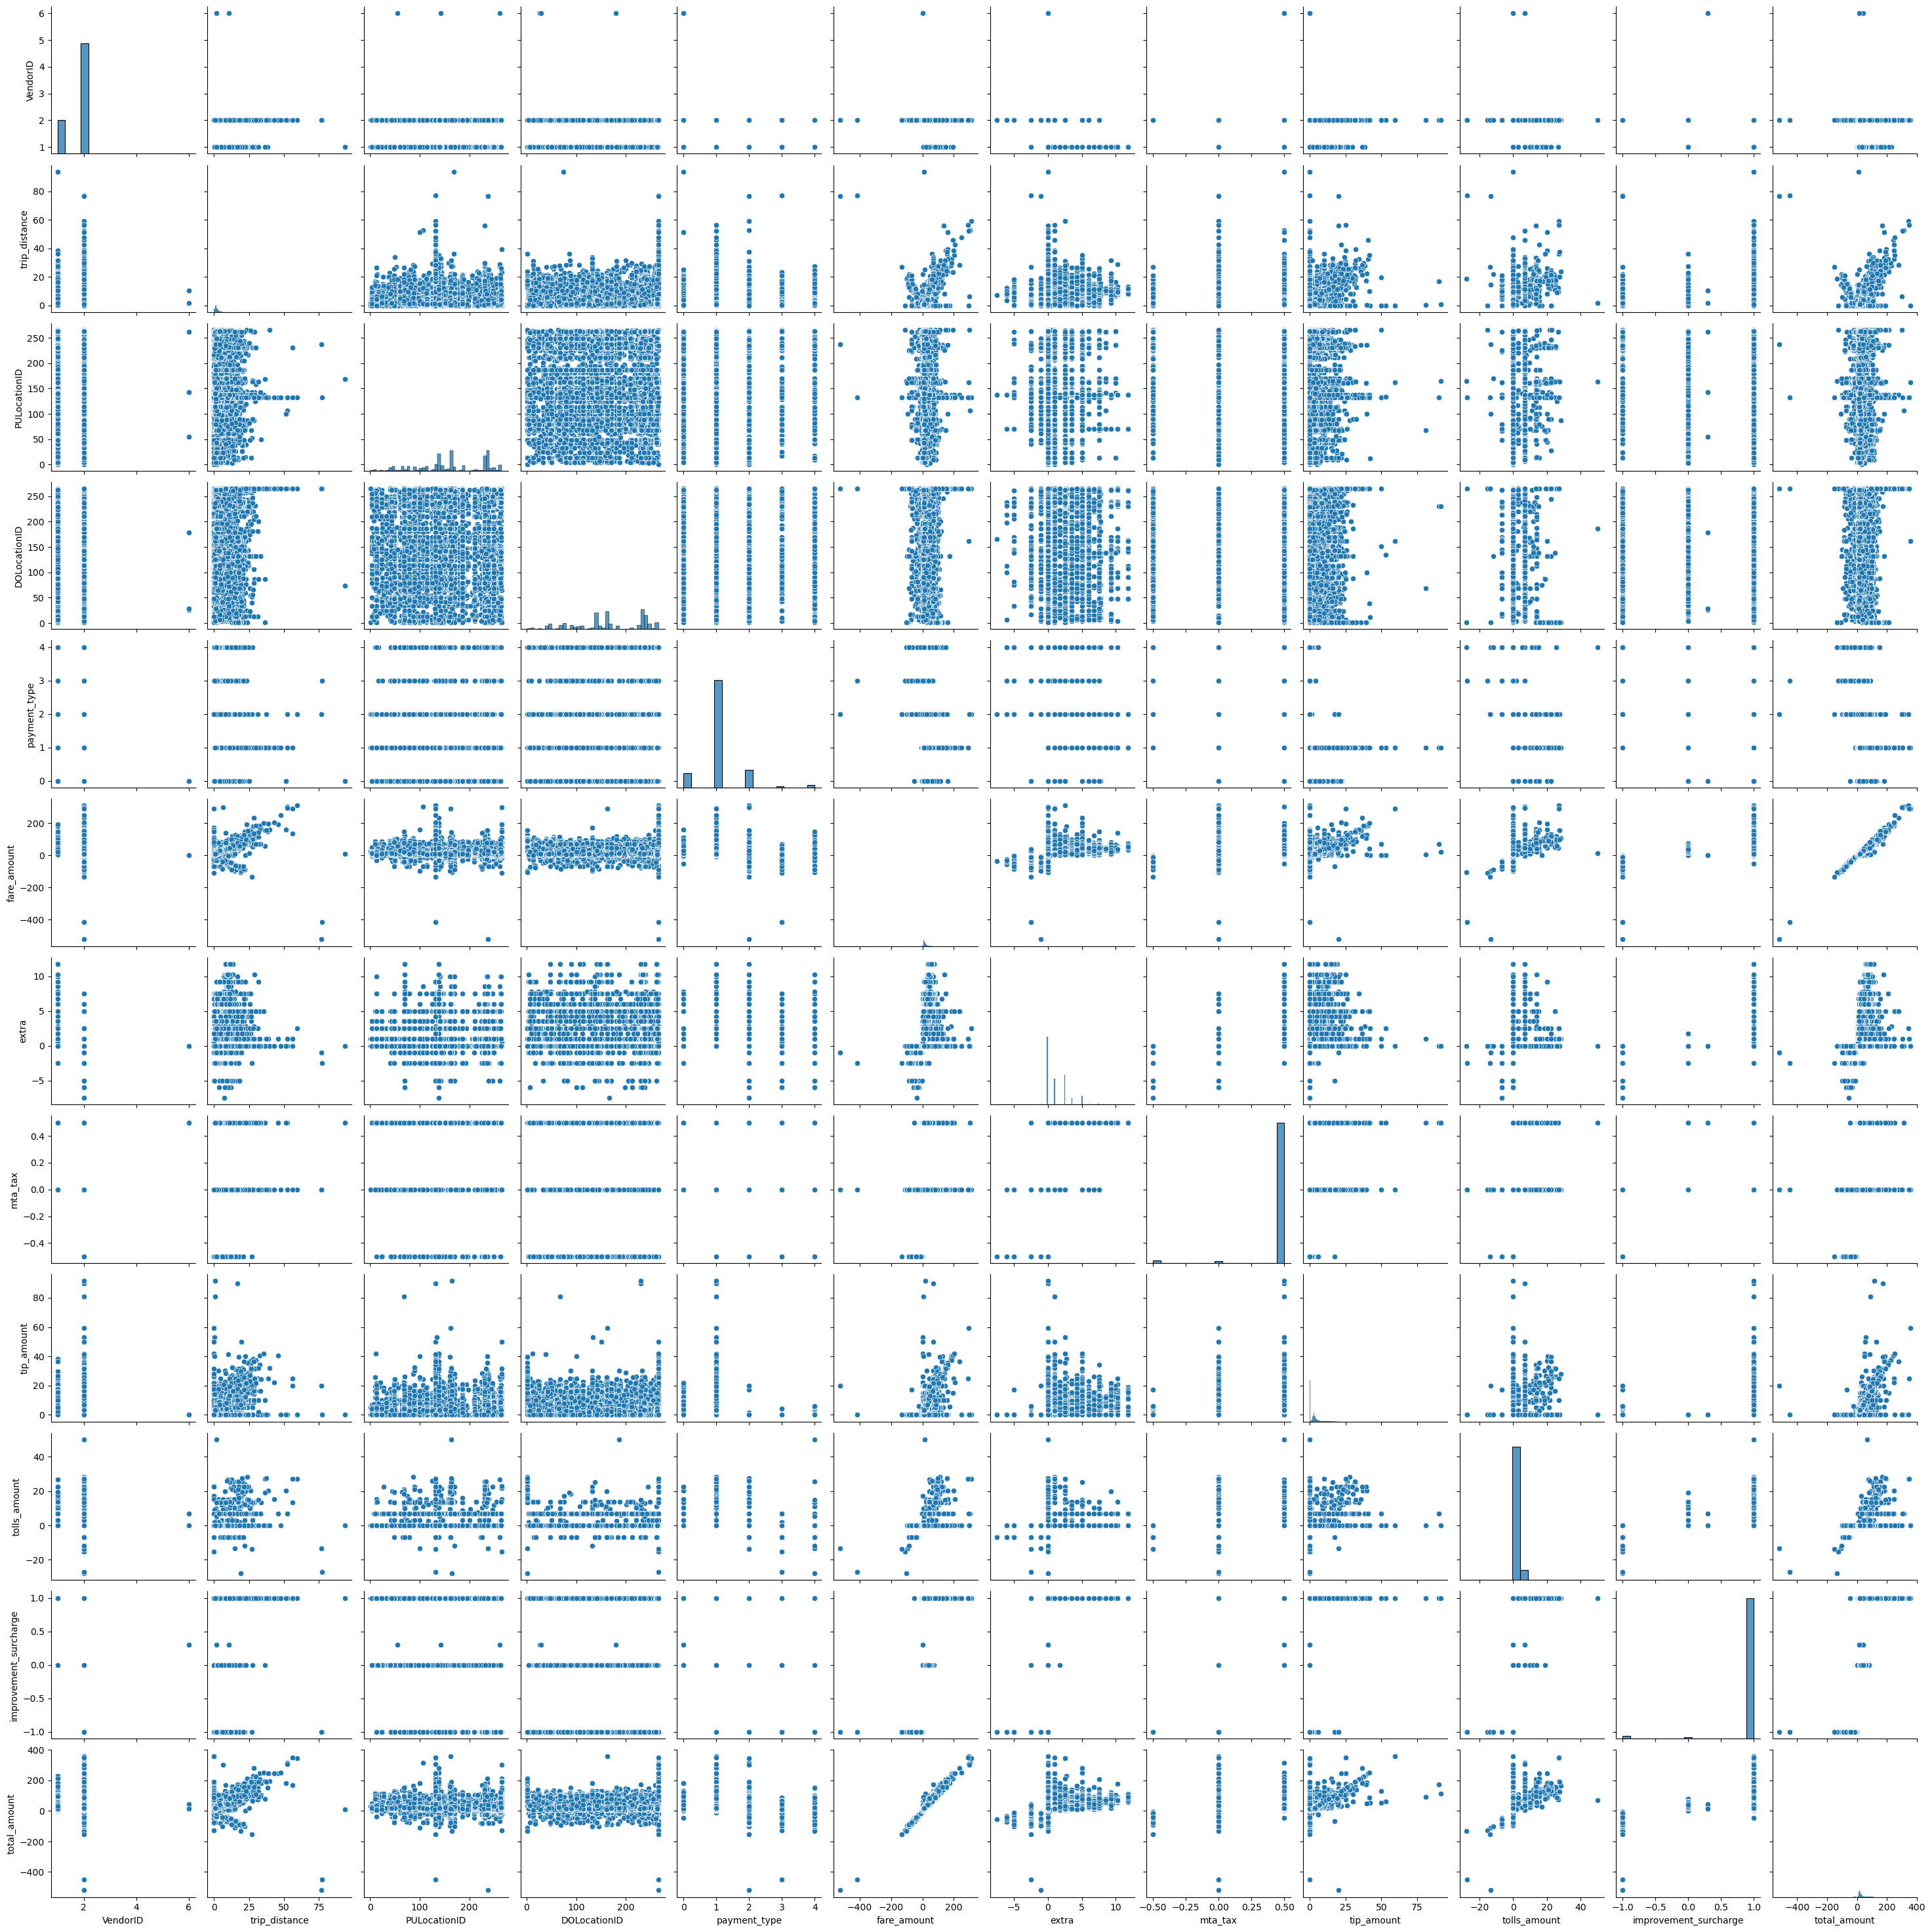

In [16]:
# Exploratory Data Analysis (EDA)

df_sam = df.sample(frac=0.01, random_state=42) # Taking 1% of the dataset as sample
df_sam.shape
sns.pairplot(df_sam)
plt.show()

In [18]:
# Feature Engineering

df_sample = df.sample(frac=0.1, random_state=42)

In [20]:
df_sample.shape

(364637, 19)

In [22]:
df_sample['tpep_pickup_datetime'] = pd.to_datetime(df_sample['tpep_pickup_datetime'])  # Convert to datetime

df_sample['tpep_dropoff_datetime'] = pd.to_datetime(df_sample['tpep_dropoff_datetime'])  # Convert to datetime

df_sample['pickup_hour'] = df_sample['tpep_pickup_datetime'].dt.hour  # Extract pickup hour

df_sample['pickup_day'] = df_sample['tpep_pickup_datetime'].dt.dayofweek  # Extract day of week

df_sample['is_weekend'] = df_sample['pickup_day'].apply(lambda x: 1 if x >= 5 else 0)  # 1 = Weekend, 0 = Weekday

df_sample['trip_duration'] = (df_sample['tpep_dropoff_datetime'] - df_sample['tpep_pickup_datetime']).dt.total_seconds() / 60.0  # Trip duration (min)

df_sample['average_speed'] = df_sample['trip_distance'] / (df_sample['trip_duration'] / 60.0)  # Speed (mph)

df_sample['fare_per_mile'] = df_sample['fare_amount'] / df_sample['trip_distance']  # Cost per mile

df_sample['fare_per_minute'] = df_sample['fare_amount'] / df_sample['trip_duration']  # Cost per minute

In [23]:
# Handling Outliers (IQR Method)
features_to_check = ['trip_duration', 'average_speed', 'fare_per_mile', 'fare_per_minute']
for feature in features_to_check:
    Q1 = df_sample[feature].quantile(0.25)
    Q3 = df_sample[feature].quantile(0.75)
    IQR = Q3 - Q1
    df_sample = df_sample[(df_sample[feature] >= (Q1 - 1.5 * IQR)) & (df_sample[feature] <= (Q3 + 1.5 * IQR))]

In [26]:
# Machine Learning (Predicting fare amount)
features = ['trip_distance', 'pickup_hour', 'pickup_day', 'is_weekend', 'trip_duration', 'average_speed', 'fare_per_mile', 'fare_per_minute']
target = 'fare_amount'

In [28]:
X = df_sample[features]
y = df_sample[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
model = RandomForestRegressor(n_estimators=30, max_depth=8, max_features='sqrt', random_state=42, n_jobs=-1)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [33]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R^2 Score: {r2}')
print(f'Mean Squared Error: {mse}')

R^2 Score: 0.980754583103498
Mean Squared Error: 1.3217540034281077


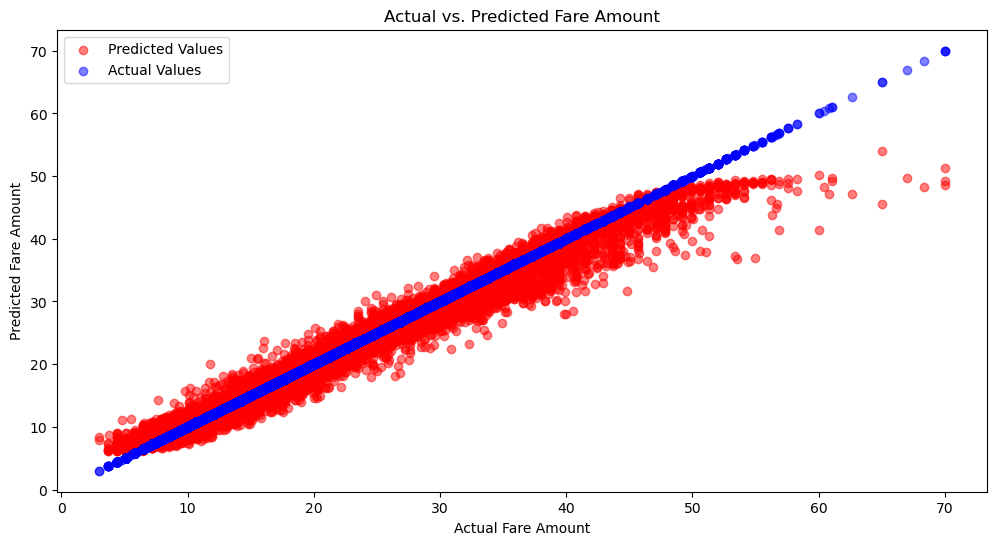

In [36]:
plt.figure(figsize=(12, 6))

# Scatter plot
plt.scatter(y_test, y_pred, alpha=0.5, color='red', label="Predicted Values")
plt.scatter(y_test, y_test, alpha=0.5, color='blue', label="Actual Values")

plt.xlabel("Actual Fare Amount")
plt.ylabel("Predicted Fare Amount")
plt.title("Actual vs. Predicted Fare Amount")
plt.legend(loc="upper left")  # Add a legend to differentiate colors
plt.show()

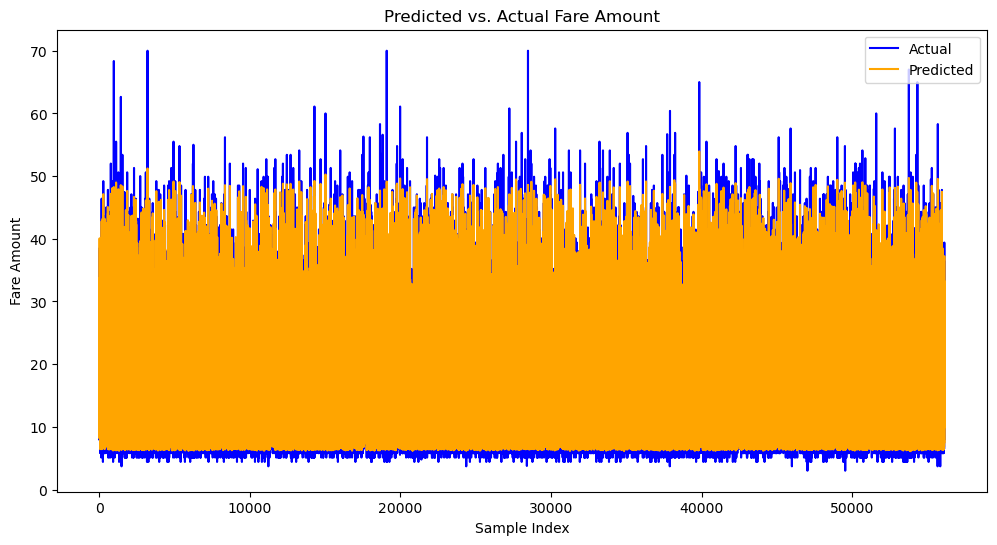

In [38]:
# Predicted vs. Actual (Line Plot)
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label="Actual", color='blue')
plt.plot(range(len(y_test)), y_pred, label="Predicted", color='orange')
plt.xlabel("Sample Index")
plt.ylabel("Fare Amount")
plt.title("Predicted vs. Actual Fare Amount")
plt.legend(loc = 'upper right')
plt.show()

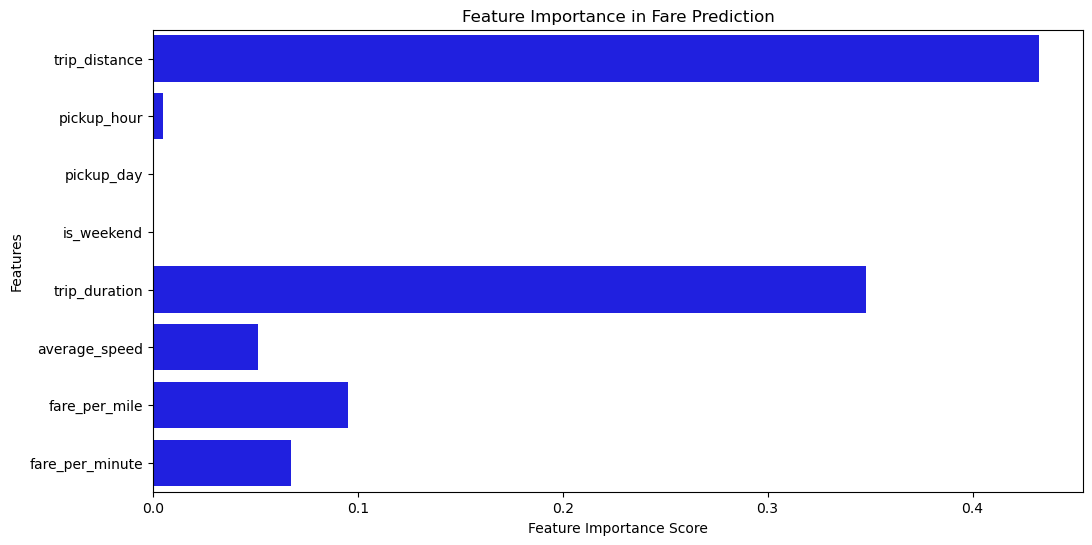

In [40]:
# Feature Importance (Bar Chart)
importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=feature_names, color='blue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Fare Prediction")
plt.show()

In [48]:
import pickle as pkl
path = "uber2024.sav"
pkl.dump(model, open(path, "wb"))